In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [132]:
df = pd.read_csv('diamond_cleaned.csv')
df = df.dropna()
print(df)

          carat     price         x         y         z
0      0.016667  0.000000  0.039783  0.053763  0.238318
1      0.005556  0.000000  0.028933  0.028674  0.210280
2      0.016667  0.000086  0.057866  0.069892  0.210280
3      0.050000  0.000692  0.084991  0.098566  0.285047
4      0.061111  0.000778  0.110307  0.120072  0.313084
...         ...       ...       ...       ...       ...
53935  0.288889  0.210258  0.365280  0.372760  0.488318
53936  0.288889  0.210258  0.354430  0.370968  0.514019
53937  0.277778  0.210258  0.349005  0.358423  0.502336
53938  0.366667  0.210258  0.437613  0.437276  0.544393
53939  0.305556  0.210258  0.379747  0.392473  0.521028

[49000 rows x 5 columns]


In [133]:
X_data = df.drop('price',axis = 'columns')
Y_data = df.price
print(Y_data)
print(np.shape(Y_data))
print(X_data)
print(np.shape(X_data))

train_count = int(0.8*(len(X_data)))

X_train = X_data[:train_count]
X_test = X_data[train_count:]
Y_train = Y_data[:train_count]
Y_test = Y_data[train_count:]

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

lambda_value = 1.0
num_columns = X_train.shape[1]
I = np.identity(num_columns)

coefficients = np.linalg.inv(X_train.T @ X_train + lambda_value * I) @ X_train.T @ Y_train
print(coefficients)
#coefficients = np.array([0.710528,-0.253474,0.537378,-0.146495])
print(np.shape(coefficients))
y_pred = X_test @ coefficients.values
print(y_pred)

0        0.000000
1        0.000000
2        0.000086
3        0.000692
4        0.000778
           ...   
53935    0.210258
53936    0.210258
53937    0.210258
53938    0.210258
53939    0.210258
Name: price, Length: 49000, dtype: float64
(49000,)
          carat         x         y         z
0      0.016667  0.039783  0.053763  0.238318
1      0.005556  0.028933  0.028674  0.210280
2      0.016667  0.057866  0.069892  0.210280
3      0.050000  0.084991  0.098566  0.285047
4      0.061111  0.110307  0.120072  0.313084
...         ...       ...       ...       ...
53935  0.288889  0.365280  0.372760  0.488318
53936  0.288889  0.354430  0.370968  0.514019
53937  0.277778  0.349005  0.358423  0.502336
53938  0.366667  0.437613  0.437276  0.544393
53939  0.305556  0.379747  0.392473  0.521028

[49000 rows x 4 columns]
(49000, 4)
(39200, 4) (9800, 4) (39200,) (9800,)
0    0.709109
1   -0.156947
2    0.435824
3   -0.140675
dtype: float64
(4,)
43191    0.113401
43192    0.164554
43193    0.

(39200, 4)
(39200,)
Training error 0.011801248844662396


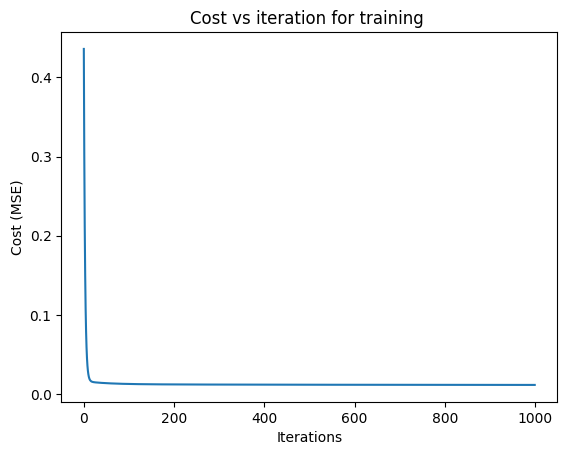

(9800, 4)
(9800,)
Testing error 0.00041566544813843203


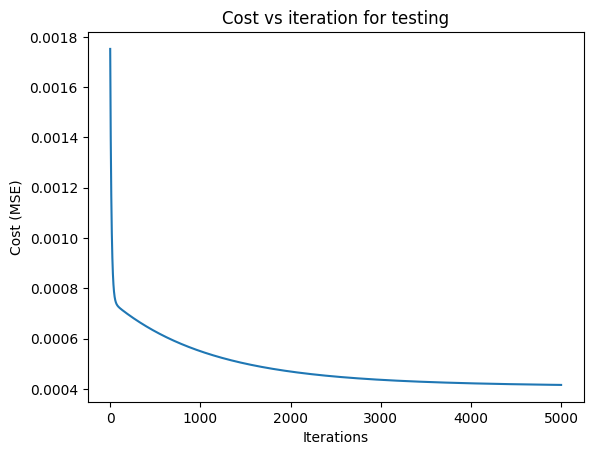

gradient :  [-0.00793124 -0.00200636 -0.00269585 -0.00275121 -0.00376139]
cost :  0.0010590464511841698
gradient :  [-0.00676009 -0.00282545 -0.00348964 -0.00350468 -0.00414652]
cost :  0.0032313350670702705
gradient :  [-0.00583369 -0.00341173 -0.00405218 -0.00403715 -0.00439926]
cost :  0.00662569639413025


In [134]:
alpha = 0.1
theta = np.zeros((X_train.shape[1], 1))
num_iterations = 1000
XwithBias = np.c_[np.ones((39200, 1)), X_train]
y = Y_train 
print(np.shape(X_train))
print(np.shape(Y_train))
coefficients = np.random.rand(5)
training_cost_history = []

for _ in range(num_iterations):
    error = np.dot(XwithBias, coefficients) - Y_train
    regularization_term = lambda_value * np.hstack((0, coefficients[1:]))  # Regularization term
    gradient = (1 / len(Y_train)) * (np.dot(XwithBias.T, error) + regularization_term)
    coefficients -= alpha * gradient
    cost = 0.5 * np.mean(error**2) + (lambda_value / (2 * len(Y_train))) * np.sum(coefficients[1:]**2)
    training_cost_history.append(cost)
    if():
        break;
    
print("Training error",cost)
plt.plot(range(num_iterations), training_cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs iteration for training ")
plt.show()

theta = np.zeros((X_test.shape[1], 1))
print(np.shape(X_test))
print(np.shape(Y_test))
XwithBias = np.c_[np.ones((9800, 1)), X_test]
y = Y_test
testing_cost_history = []
num_iterations = 5000


for _ in range(num_iterations):
    error = np.dot(XwithBias, coefficients) - Y_test
    regularization_term = lambda_value * np.hstack((0, coefficients[1:]))  # Regularization term
    gradient = (1 / len(Y_train)) * (np.dot(XwithBias.T, error) + regularization_term)
    coefficients -= alpha * gradient
    cost = 0.5 * np.mean(error**2) + (lambda_value / (2 * len(Y_train))) * np.sum(coefficients[1:]**2)
    testing_cost_history.append(cost)
    
plt.plot(range(num_iterations), testing_cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs iteration for testing")
print("Testing error",cost)
plt.show()



num_iterations = 5000
testing_cost_history = []
cost = 0
gradient = []
coefficients = [x - 0.11 for x in coefficients]
for _ in range(num_iterations):
    error = np.dot(XwithBias, coefficients) - Y_test
    regularization_term = lambda_value * np.hstack((0, coefficients[1:]))  # Regularization term
    gradient = (1 / len(Y_train)) * (np.dot(XwithBias.T, error) + regularization_term)
    coefficients -= alpha * gradient
    cost = 0.5 * np.mean(error**2) + (lambda_value / (2 * len(Y_train))) * np.sum(coefficients[1:]**2)
    testing_cost_history.append(cost)
    if(np.linalg.norm(gradient) < 0.01):
        print('gradient : ',gradient)
        print('cost : ',cost)
        break;



num_iterations = 5000
testing_cost_history = []
cost = 0
gradient = []
coefficients = [x - 0.351 for x in coefficients]
for _ in range(num_iterations):
    error = np.dot(XwithBias, coefficients) - Y_test
    regularization_term = lambda_value * np.hstack((0, coefficients[1:]))  # Regularization term
    gradient = (1 / len(Y_train)) * (np.dot(XwithBias.T, error) + regularization_term)
    coefficients -= alpha * gradient
    cost = 0.5 * np.mean(error**2) + (lambda_value / (2 * len(Y_train))) * np.sum(coefficients[1:]**2)
    testing_cost_history.append(cost)
    if(np.linalg.norm(gradient) < 0.01):
        print('gradient : ',gradient)
        print('cost : ',cost)
        break;


num_iterations = 5000
testing_cost_history = []
cost = 0
gradient = []
coefficients = [x - 0.271 for x in coefficients]
for _ in range(num_iterations):
    error = np.dot(XwithBias, coefficients) - Y_test
    regularization_term = lambda_value * np.hstack((0, coefficients[1:]))  # Regularization term
    gradient = (1 / len(Y_train)) * (np.dot(XwithBias.T, error) + regularization_term)
    coefficients -= alpha * gradient
    cost = 0.5 * np.mean(error**2) + (lambda_value / (2 * len(Y_train))) * np.sum(coefficients[1:]**2)
    testing_cost_history.append(cost)
    if(np.linalg.norm(gradient) < 0.01):
        print('gradient : ',gradient)
        print('cost : ',cost)
        break;



In [135]:
#FINALLY IM PRINTING THE COST FOR DIFFERENT PARAMETERS

In [141]:
import numpy as np

alpha = 0.1
l1_ratio = 0.5
theta = np.random.rand(X_data.shape[1])

num_iterations = 1000
learning_rate = 0.01

for _ in range(num_iterations):
    y_pred = np.dot(X_train, theta)
    error = y_pred - Y_train

    l1_gradient = l1_ratio * np.sign(theta)
    l2_gradient = (1 - l1_ratio) * 2 * theta

    theta -= (1 / len(X_train)) * (np.dot(X_train.T, error) + alpha * (l1_gradient + l2_gradient))

y_pred_test = np.dot(X_test, theta)

mse = np.mean((y_pred_test - Y_test) ** 2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.003218636420812785
